In [1]:
from siphon.catalog import TDSCatalog
import xarray as xr
import metpy

In [2]:
best_gfs = TDSCatalog('https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
                      'Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best')

In [3]:
best_ds = best_gfs.datasets[0]

In [5]:
ds = xr.open_dataset(best_ds.access_urls['OPENDAP']).sel(lon=slice(360-150, 360-50, 2), lat=slice(65, 20, 2))

In [6]:
data_var = ds.metpy.parse_cf('Relative_humidity_zeroDegC_isotherm')

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.feature as cfeature
%matplotlib inline

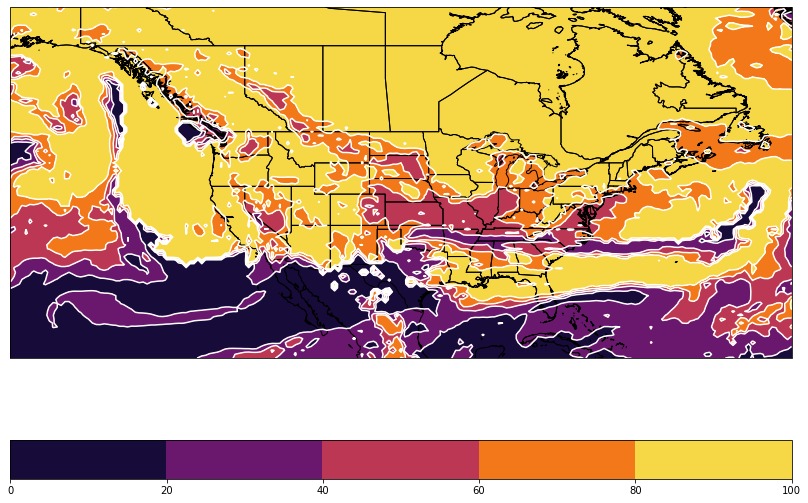

In [10]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(1, 1, 1, projection=data_var.metpy.cartopy_crs)
cf = ax.contourf(data_var.lon, data_var.lat, data_var.isel(time1=0), levels=np.arange(0, 110, 20), cmap='inferno')
ax.contour(data_var.lon, data_var.lat, data_var.isel(time1=0), levels=np.arange(0, 110, 20), colors='white')
ax.coastlines(color='black', resolution='10m')
ax.add_feature(cfeature.STATES.with_scale('50m'))
plt.colorbar(cf, orientation='horizontal')